<a href="https://colab.research.google.com/github/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/blob/main/Simulation_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [2]:
path_to_data2 = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/main/'

In [3]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [ ]:
# data_orig = pd.read_csv(path_to_data2+"Sim_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
# data_SRS = pd.read_csv(path_to_data2+"Sim_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv(path_to_data2+"Sim_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_Sy = pd.read_csv(path_to_data2+"Sim_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_Sym = pd.read_csv(path_to_data2+"Sim_Sy_multi_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv(path_to_data2+"Sim_SRS_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv(path_to_data2+"Sim_Sy_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)


data_orig = pd.read_csv(path_to_data2+ "Sim_Imbalanced_Fine_Tuning.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+ "Sim_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+ "Sim_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+ "Sim_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2+ "Sim_Sy_multi_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+ "Sim_SRS_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+ "Sim_Sy_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)



# data_orig

Original (imbalanced) data performance:

In [ ]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.035272,0.681661
1,1,0.029552,0.705882
2,2,0.023832,0.733564
3,3,0.028599,0.709343
4,4,0.023832,0.737024
...,...,...,...
95,95,0.016206,0.771626
96,96,0.035272,0.702422
97,97,0.033365,0.705882
98,98,0.033365,0.705882


Error type: FPR
Mean: 0.025757864632983744
Variance: 0.00011222685680451531
Variance of estimate: 1.1222685680451532e-06
Standard error: 0.0010593717798984231
95% Confidence Interval:  [ 0.023681495944382833 ,  0.027834233321584655 ]
-----------------------------
Error type: FNR
Mean: 0.7319031141868512
Variance: 0.0032930640198273495
Variance of estimate: 3.2930640198273495e-05
Standard error: 0.005738522475191109
95% Confidence Interval:  [ 0.7206556101354766 ,  0.7431506182382257 ]
-----------------------------


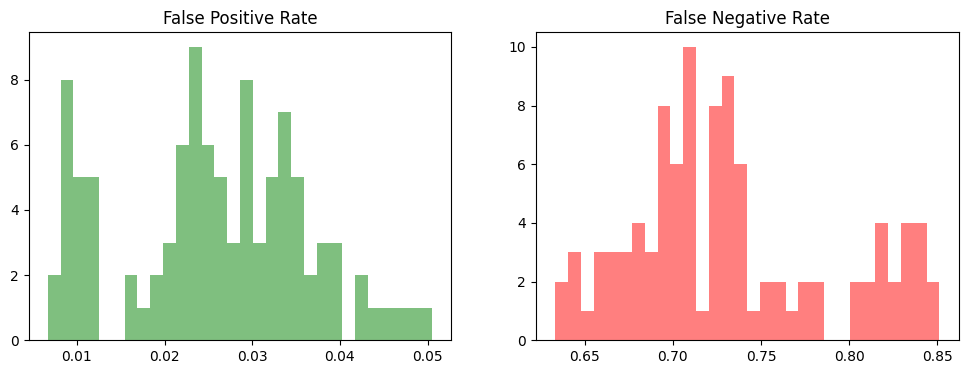

In [ ]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.11865109626955192
Variance: 0.0008052603753032327
Variance of estimate: 4.026301876516164e-06
Standard error: 0.00200656469532287
95% Confidence Interval:  [ 0.1147182294667191 ,  0.12258396307238474 ]
-----------------------------
Error type: FNR
Mean: 0.5511764705738582
Variance: 0.004217227224836241
Variance of estimate: 2.1086136124181206e-05
Standard error: 0.0045919642990969785
95% Confidence Interval:  [ 0.5421762205476282 ,  0.5601767206000883 ]
-----------------------------


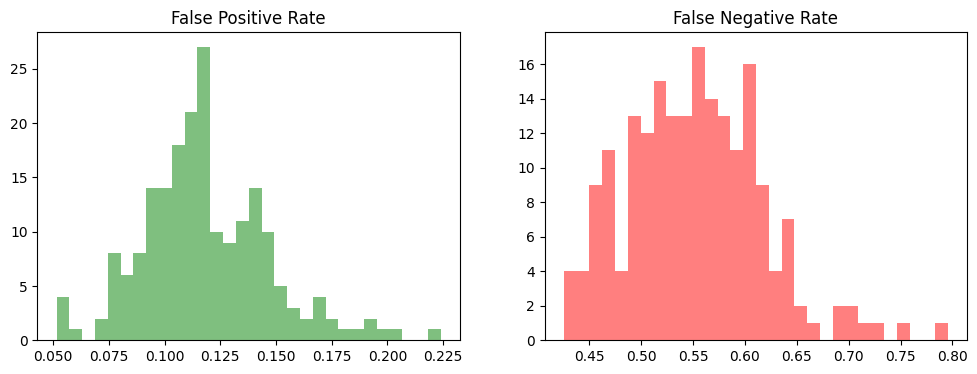

In [ ]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.10657769301755955
Variance: 0.0009690574254542063
Variance of estimate: 4.8452871272710315e-06
Standard error: 0.0022012012918565696
95% Confidence Interval:  [ 0.10226333848552067 ,  0.11089204754959843 ]
-----------------------------
Error type: FNR
Mean: 0.5833044982723875
Variance: 0.007645107343400977
Variance of estimate: 3.8225536717004886e-05
Standard error: 0.006182680382892592
95% Confidence Interval:  [ 0.571186444721918 ,  0.595422551822857 ]
-----------------------------


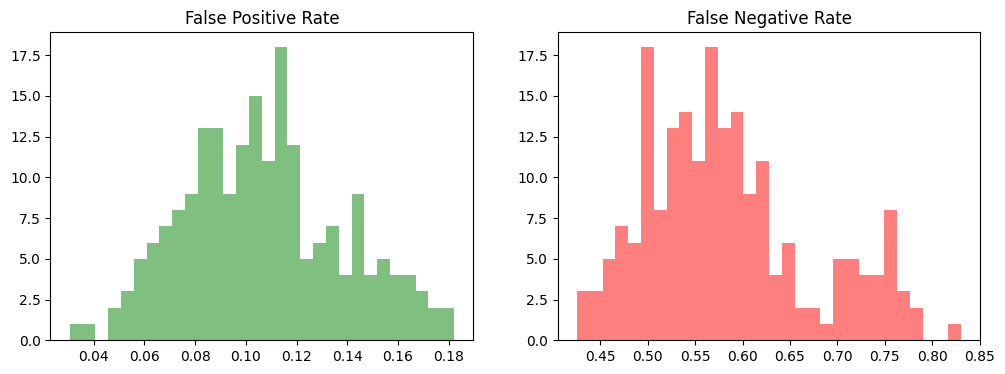

In [ ]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.10977121066955668
Variance: 0.0008338554556674335
Variance of estimate: 4.169277278337167e-06
Standard error: 0.0020418808188376637
95% Confidence Interval:  [ 0.10576912426463486 ,  0.1137732970744785 ]
-----------------------------
Error type: FNR
Mean: 0.5718166089819723
Variance: 0.006919933596259539
Variance of estimate: 3.4599667981297695e-05
Standard error: 0.00588214824543701
95% Confidence Interval:  [ 0.5602875984209157 ,  0.5833456195430289 ]
-----------------------------


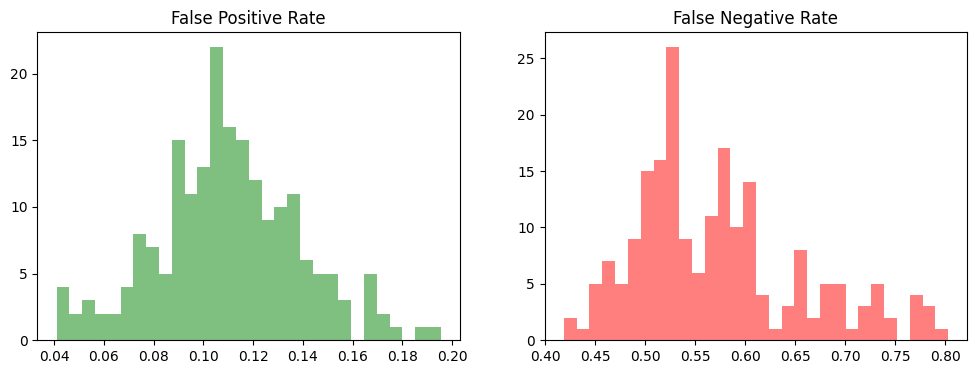

In [ ]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.11085319348559577
Variance: 0.0012858389532565127
Variance of estimate: 6.4291947662825635e-06
Standard error: 0.002535585685060271
95% Confidence Interval:  [ 0.10588344554287764 ,  0.11582294142831391 ]
-----------------------------
Error type: FNR
Mean: 0.581418685116263
Variance: 0.0057356152537094834
Variance of estimate: 2.867807626854742e-05
Standard error: 0.005355191524917425
95% Confidence Interval:  [ 0.5709225097274249 ,  0.5919148605051012 ]
-----------------------------


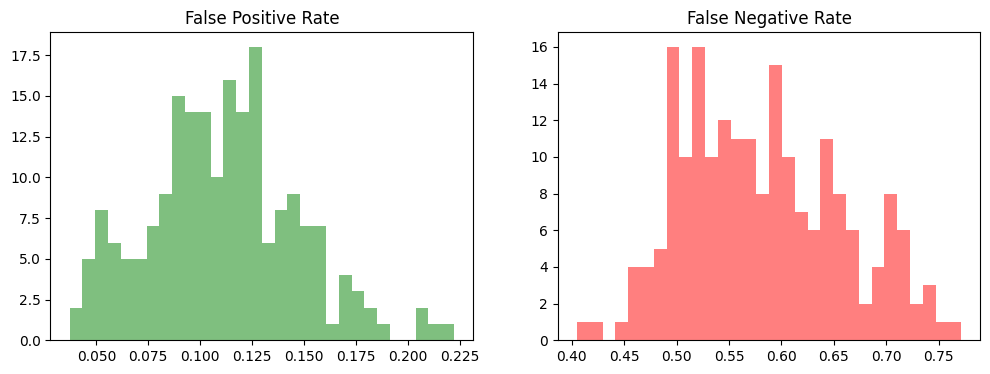

In [ ]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.09519542419371305
Variance: 0.0006395296771909691
Variance of estimate: 3.1976483859548456e-06
Standard error: 0.0017881969650893734
95% Confidence Interval:  [ 0.09169055814213788 ,  0.09870029024528822 ]
-----------------------------
Error type: FNR
Mean: 0.5407439446322491
Variance: 0.002734658132192362
Variance of estimate: 1.367329066096181e-05
Standard error: 0.0036977412917836494
95% Confidence Interval:  [ 0.5334963717003531 ,  0.547991517564145 ]
-----------------------------


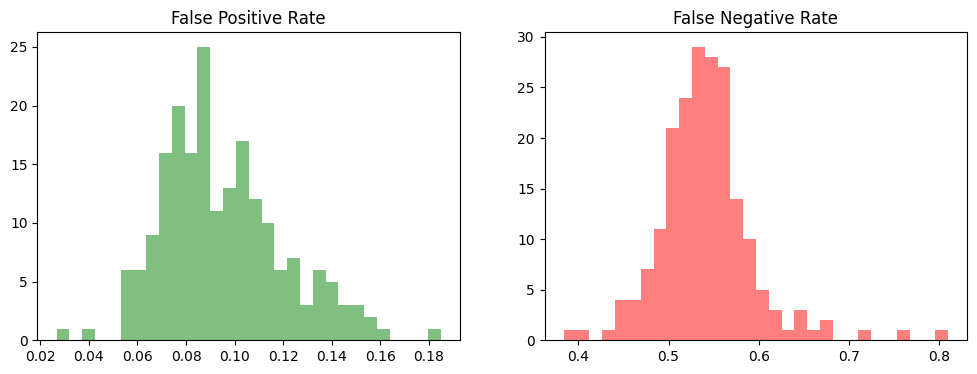

In [ ]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.09166348902811725
Variance: 0.0008183503498010383
Variance of estimate: 4.091751749005191e-06
Standard error: 0.002022807887320294
95% Confidence Interval:  [ 0.08769878556896947 ,  0.09562819248726502 ]
-----------------------------
Error type: FNR
Mean: 0.5647231833836505
Variance: 0.0059277117990532355
Variance of estimate: 2.9638558995266176e-05
Standard error: 0.0054441306923388765
95% Confidence Interval:  [ 0.5540526872266662 ,  0.5753936795406347 ]
-----------------------------


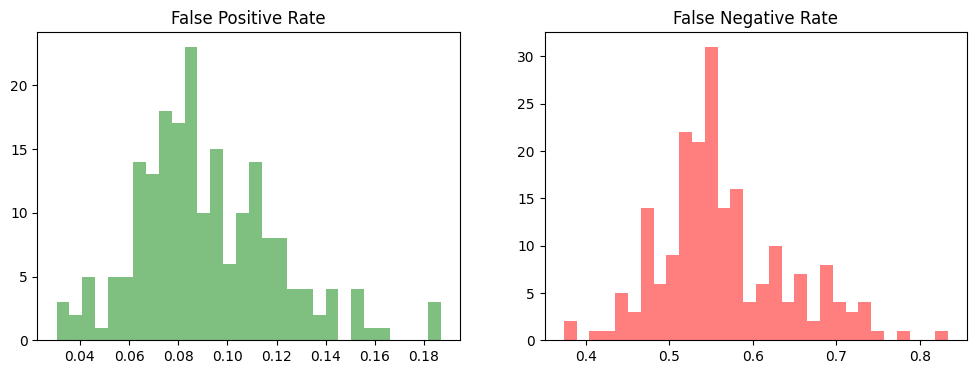

In [ ]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [ ]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.141087,0.118208,0.113441,0.107722,0.101049,0.095329,0.035272
1,0.144900,0.115348,0.119161,0.122021,0.088656,0.081983,0.029552
2,0.148713,0.169685,0.090562,0.102955,0.055291,0.063870,0.023832
3,0.114395,0.108675,0.137274,0.087703,0.111535,0.099142,0.028599
4,0.125834,0.122021,0.091516,0.091516,0.133460,0.095329,0.023832
...,...,...,...,...,...,...,...
195,0.139180,0.086749,0.111535,0.125834,0.158246,0.080076,NaN
196,0.124881,0.146806,0.087703,0.136320,0.089609,0.122021,NaN
197,0.131554,0.069590,0.099142,0.147760,0.142040,0.056244,NaN
198,0.103908,0.119161,0.110582,0.073403,0.130601,0.115348,NaN


<Axes: title={'center': 'FPR'}>

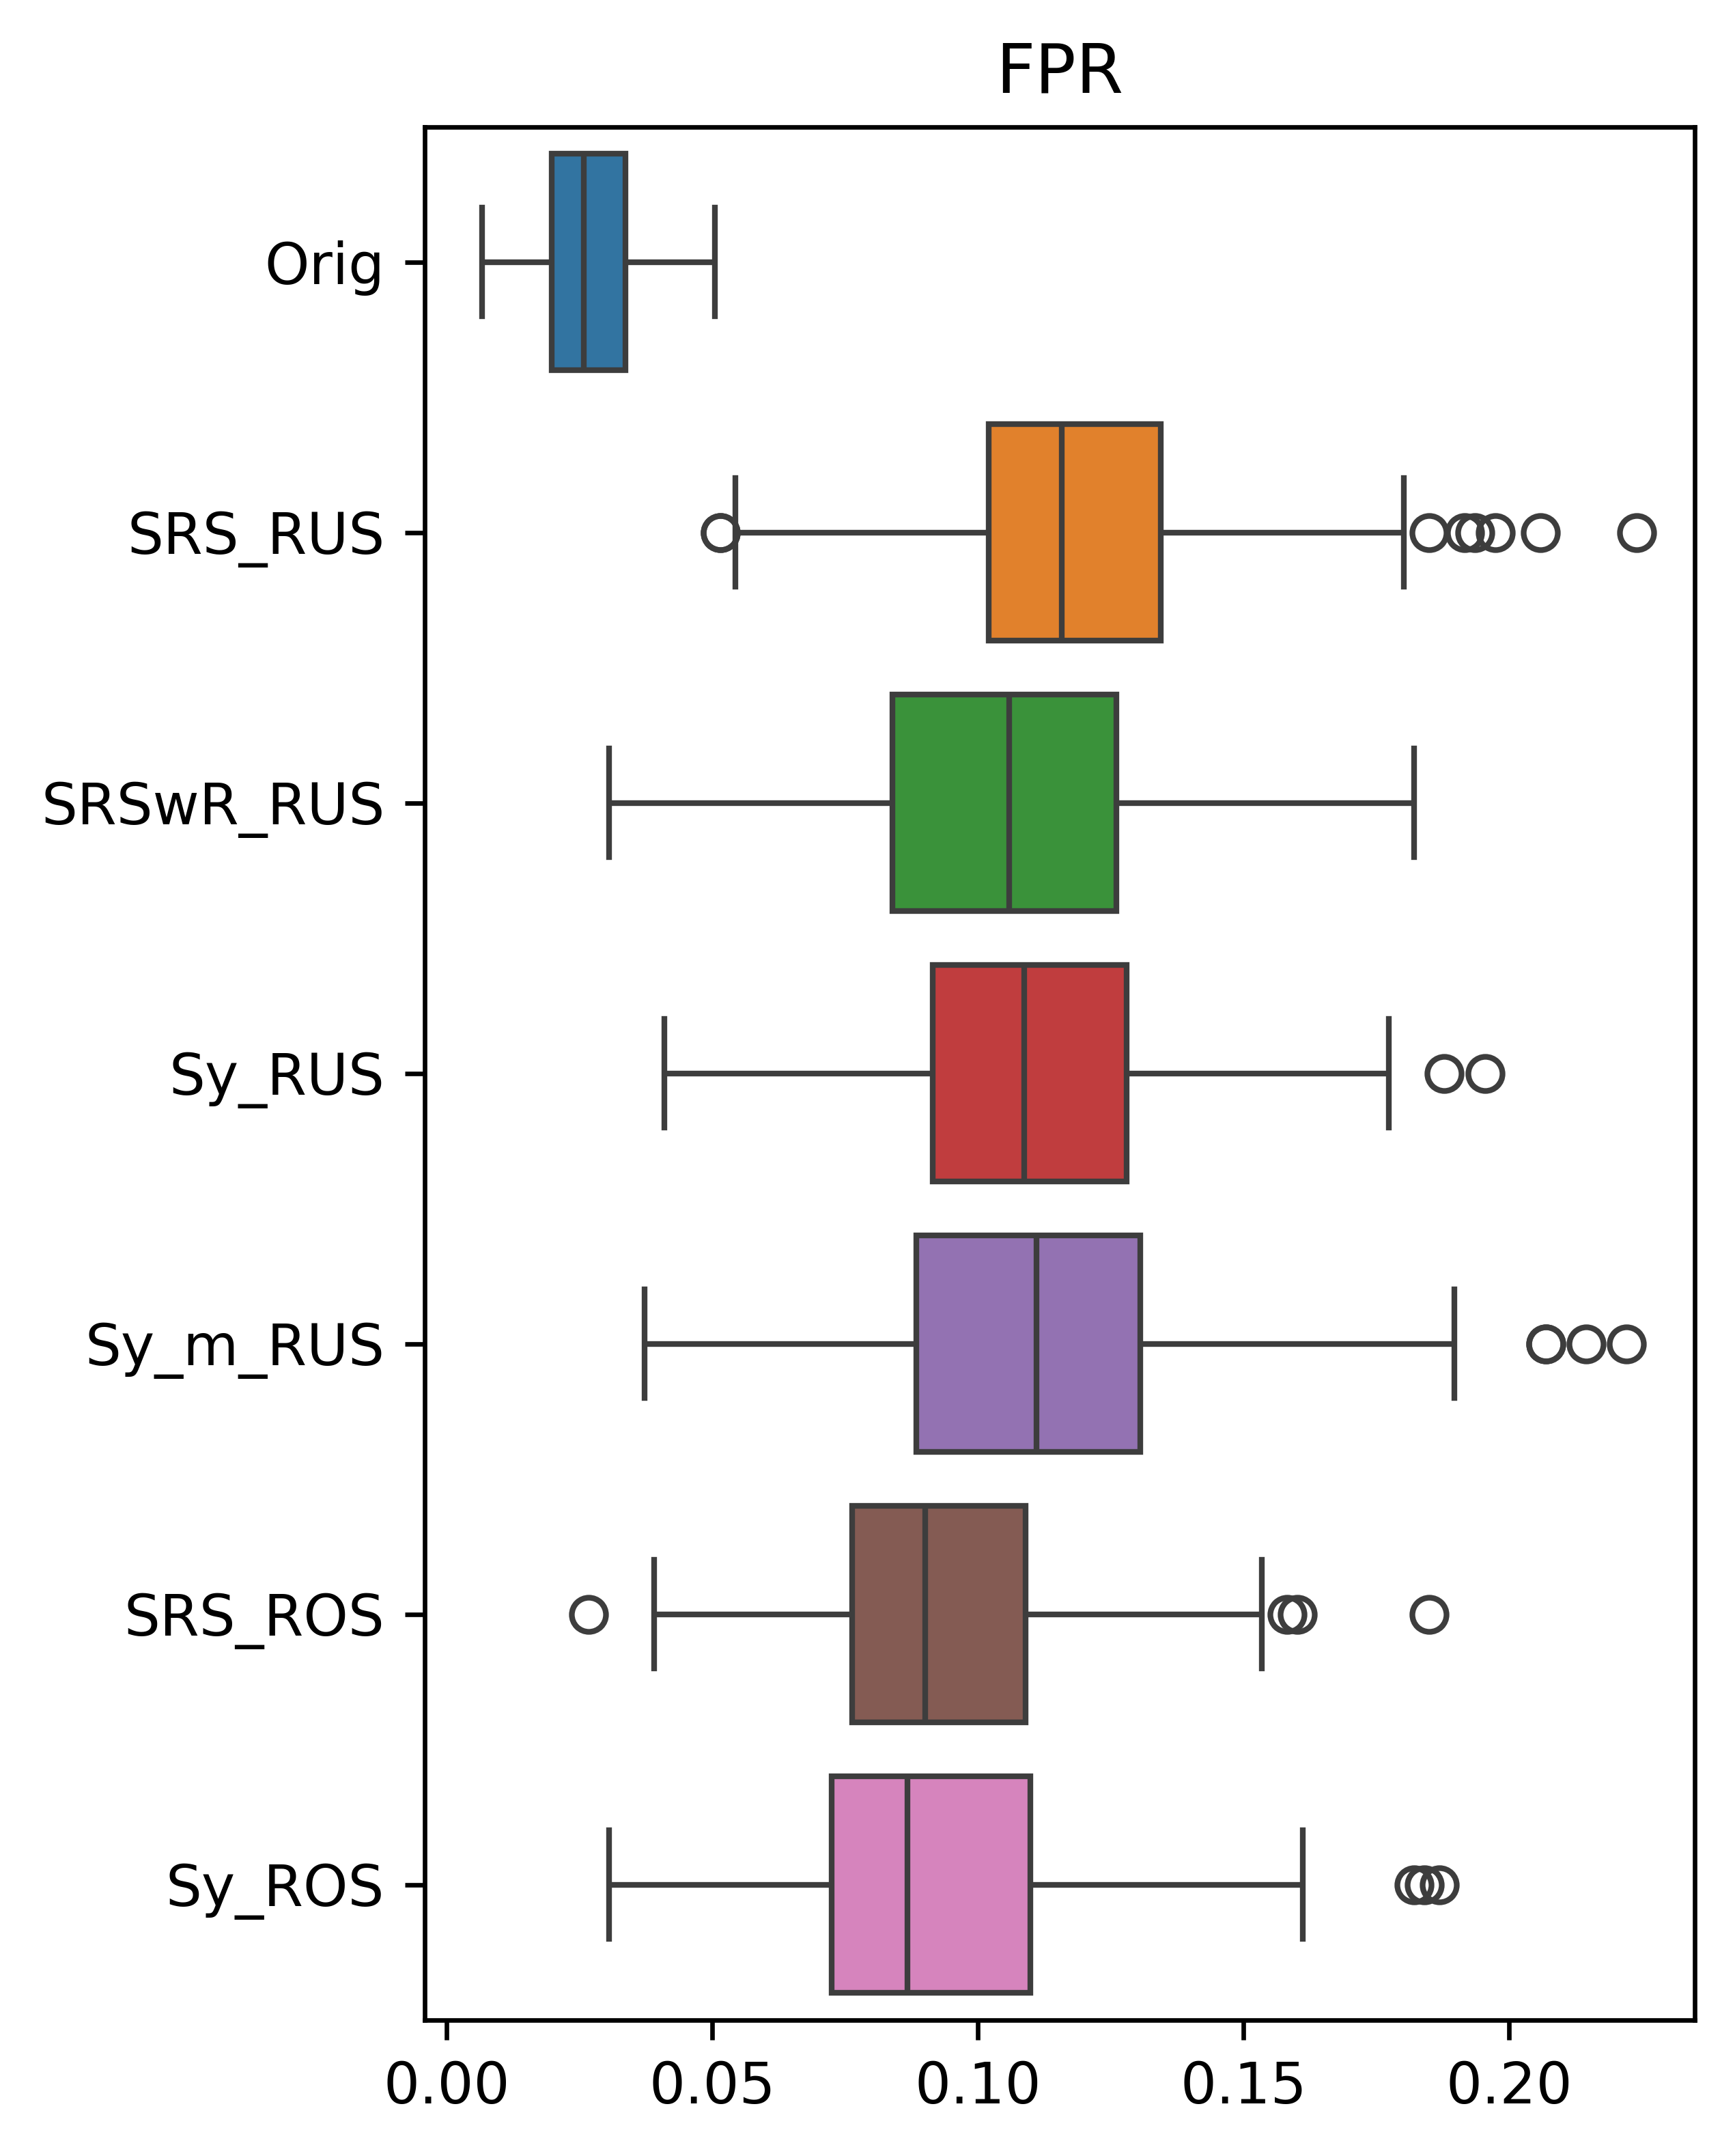

In [ ]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [ ]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.522491,0.591696,0.512111,0.508651,0.519031,0.557093,0.681661
1,0.519031,0.588235,0.501730,0.494810,0.536332,0.570934,0.705882
2,0.515571,0.498270,0.595156,0.529412,0.602076,0.626298,0.733564
3,0.591696,0.608997,0.480969,0.546713,0.498270,0.553633,0.709343
4,0.564014,0.577855,0.598616,0.543253,0.480969,0.557093,0.737024
...,...,...,...,...,...,...,...
195,0.456747,0.598616,0.543253,0.608997,0.529412,0.574394,NaN
196,0.470588,0.463668,0.591696,0.595156,0.653979,0.508651,NaN
197,0.463668,0.622837,0.570934,0.577855,0.581315,0.626298,NaN
198,0.501730,0.522491,0.532872,0.712803,0.567474,0.522491,NaN


<Axes: title={'center': 'FNR'}>

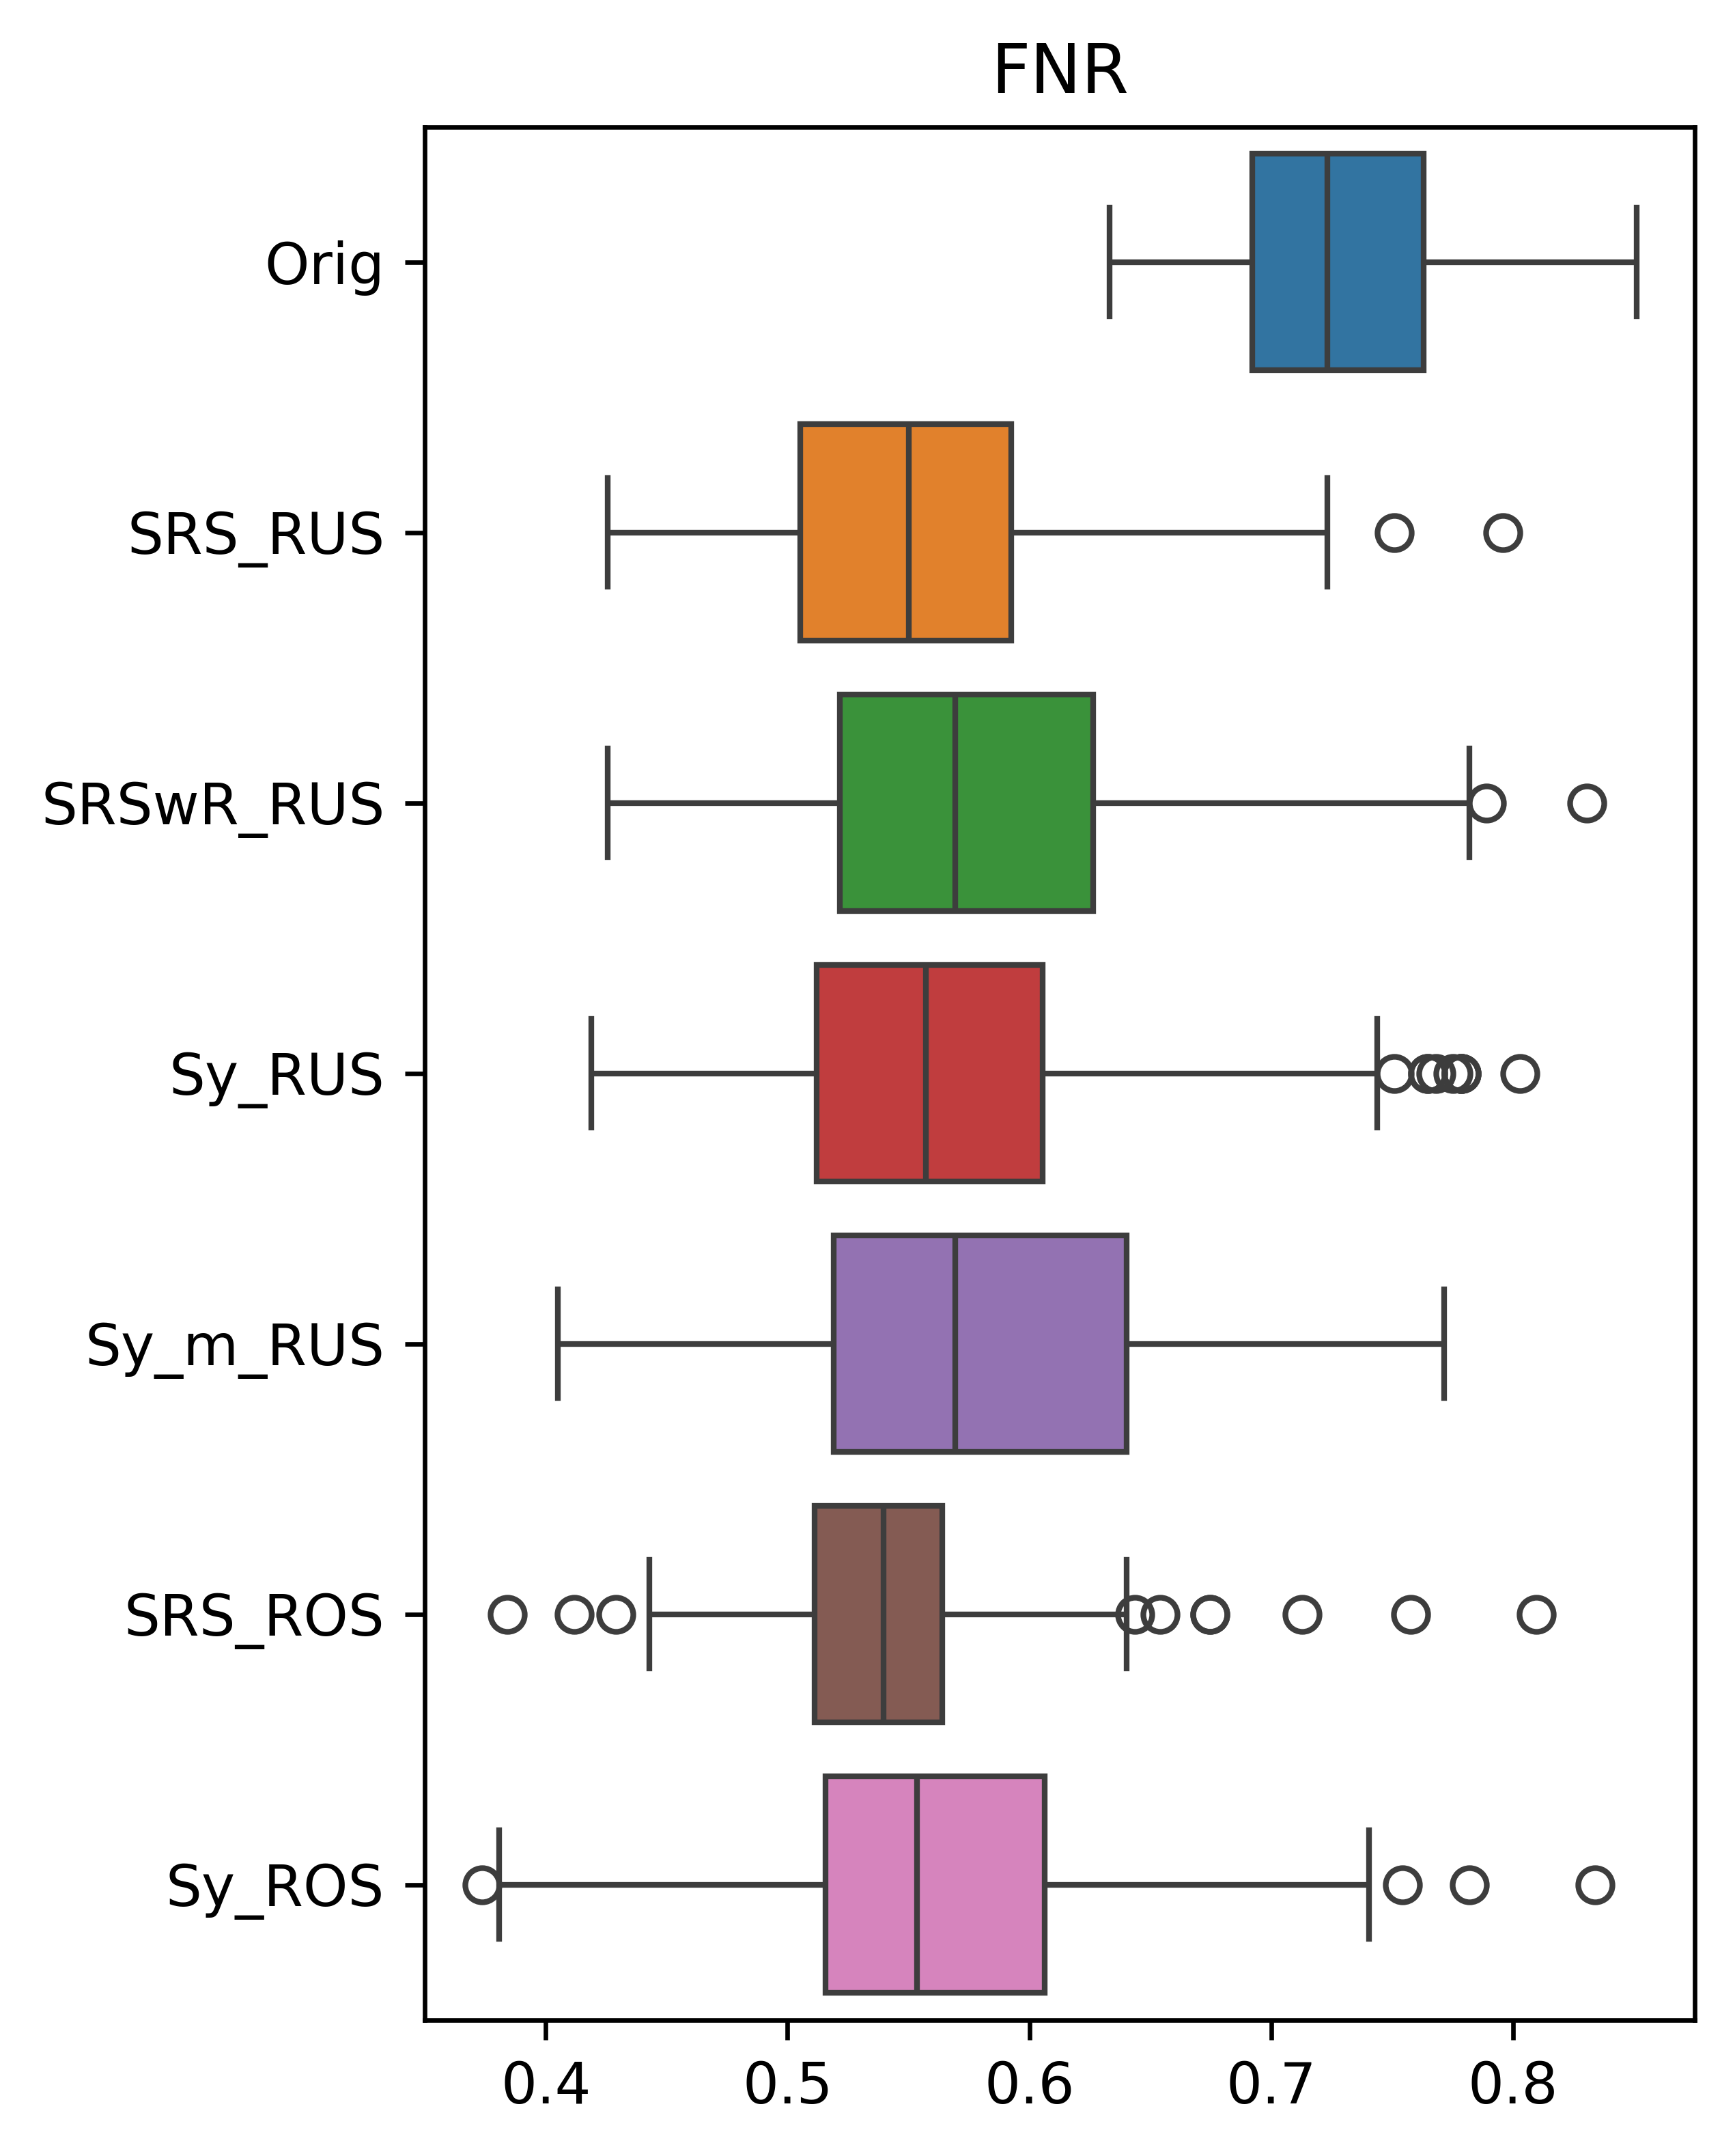

In [ ]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [4]:
data_orig = pd.read_csv(path_to_data2+"Sim_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+"Sim_SRS_RUS_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+"Sim_SRSwR_RUS_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+"Sim_Sy_RUS_Extension.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data2+"Sim_Sy2_RUS_Extension.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+"Sim_SRS_ROS_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+"Sim_Sy_ROS_Extension.csv", sep=",", header=0)


# data_orig = pd.read_csv("Sim_Imbalanced.csv", sep=",", header=0)
# data_SRS = pd.read_csv("Sim_SRS_RUS_Extension.csv", sep=",", header=0)
# data_SRSwR = pd.read_csv("Sim_SRSwR_RUS_Extension.csv", sep=",", header=0)
# data_Sy = pd.read_csv("Sim_Sy_RUS_Extension.csv", sep=",", header=0)
# data_Sy2 = pd.read_csv("Sim_Sy2_RUS_Extension.csv", sep=",", header=0)
# data_SRS_ROS = pd.read_csv("Sim_SRS_ROS_Extension.csv", sep=",", header=0)
# data_Sy_ROS = pd.read_csv("Sim_Sy_ROS_Extension.csv", sep=",", header=0)

data_SRS


,Unnamed: 0,Source time,FPR,TPR,FNR,TNR,Target time
0,0,8.274799,0.150179,0.797248,0.202752,0.849821,0.728784
1,1,8.520751,0.158750,0.824771,0.175229,0.841250,1.019159
2,2,8.490868,0.278214,0.885321,0.114679,0.721786,0.773494
3,3,8.635456,0.753929,0.983486,0.016514,0.246071,0.890272
4,4,7.494559,0.020179,0.367890,0.632110,0.979821,0.750606
...,...,...,...,...,...,...,...
95,45,12.543428,0.683750,0.977064,0.022936,0.316250,0.919908
96,46,11.950231,0.834821,0.992661,0.007339,0.165179,0.893802
97,47,12.551837,0.149286,0.705505,0.294495,0.850714,0.894187
98,48,15.594367,0.253393,0.870642,0.129358,0.746607,1.065156


Original (imbalanced) dataset:

In [5]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 100
SRSwR RUS 100
Sy RUS 100
Sym RUS 100
SRS ROS 100
Sy ROS 100


In [6]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.0762428571428571
Variance: 0.006152761817992507
Variance of estimate: 0.00012305523635985013
Standard error: 0.011093026474314848
95% Confidence Interval:  [ 0.0545005252532 ,  0.0979851890325142 ]
-----------------------------
Error type: FNR
Mean: 0.47497247706422013
Variance: 0.04820565986852615
Variance of estimate: 0.0009641131973705231
Standard error: 0.031050172259917064
95% Confidence Interval:  [ 0.4141141394347827 ,  0.5358308146936576 ]
-----------------------------
Error type: Source time
Mean: 23.887940637160135
Variance: 9.02858152524209
Variance of estimate: 0.18057163050484182
Standard error: 0.42493720771996635
95% Confidence Interval:  [ 23.055063710029 ,  24.72081756429127 ]
-----------------------------


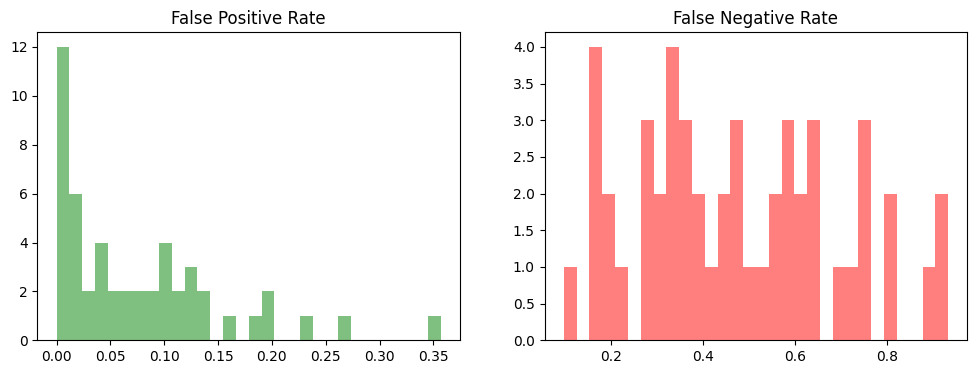

In [7]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.33077857143142864
Variance: 0.04886710569827935
Variance of estimate: 0.0004886710569827935
Standard error: 0.022105905477559463
95% Confidence Interval:  [ 0.2874509966954121 ,  0.3741061461674452 ]
-----------------------------
Error type: FNR
Mean: 0.17535779814660551
Variance: 0.02256516890453007
Variance of estimate: 0.0002256516890453007
Standard error: 0.015021707261336864
95% Confidence Interval:  [ 0.14591525191438526 ,  0.20480034437882577 ]
-----------------------------
Error type: Source time
Mean: 10.205990608209866
Variance: 2.6903534922913006
Variance of estimate: 0.026903534922913006
Standard error: 0.16402297071725352
95% Confidence Interval:  [ 9.88450558560405 ,  10.527475630815683 ]
-----------------------------


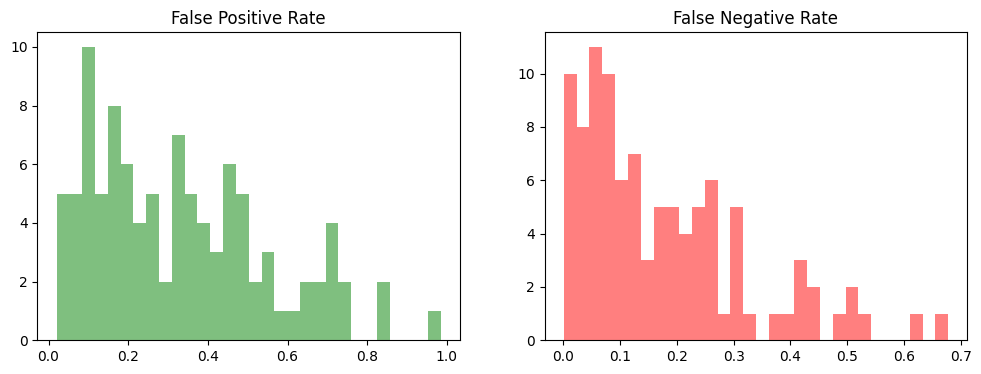

In [8]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.32856785715142856
Variance: 0.052314562702642835
Variance of estimate: 0.0005231456270264283
Standard error: 0.022872376943081984
95% Confidence Interval:  [ 0.28373799834298785 ,  0.37339771595986926 ]
-----------------------------
Error type: FNR
Mean: 0.189486238539633
Variance: 0.031871945947727534
Variance of estimate: 0.0003187194594772753
Standard error: 0.017852715745154162
95% Confidence Interval:  [ 0.15449491567913085 ,  0.22447756140013517 ]
-----------------------------
Error type: Source time
Mean: 10.363660692970239
Variance: 2.9238370920269543
Variance of estimate: 0.029238370920269544
Standard error: 0.17099231245956512
95% Confidence Interval:  [ 10.02851576054949 ,  10.698805625390987 ]
-----------------------------


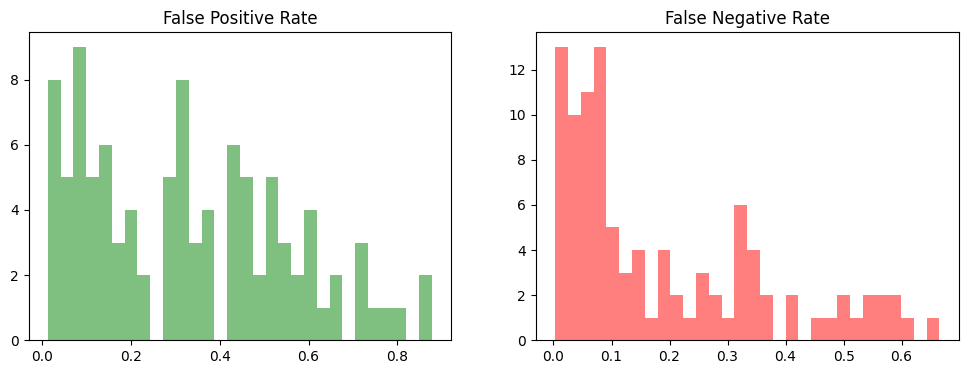

In [9]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.3371053571499999
Variance: 0.05384146908411775
Variance of estimate: 0.0005384146908411775
Standard error: 0.02320376458338555
95% Confidence Interval:  [ 0.29162597856656425 ,  0.38258473573343554 ]
-----------------------------
Error type: FNR
Mean: 0.1809541284518349
Variance: 0.029191062545704343
Variance of estimate: 0.0002919106254570434
Standard error: 0.017085392165737474
95% Confidence Interval:  [ 0.14746675980698945 ,  0.21444149709668034 ]
-----------------------------
Error type: Source time
Mean: 10.370465797230132
Variance: 3.127694525776789
Variance of estimate: 0.03127694525776789
Standard error: 0.17685289157310347
95% Confidence Interval:  [ 10.023834129746849 ,  10.717097464713415 ]
-----------------------------


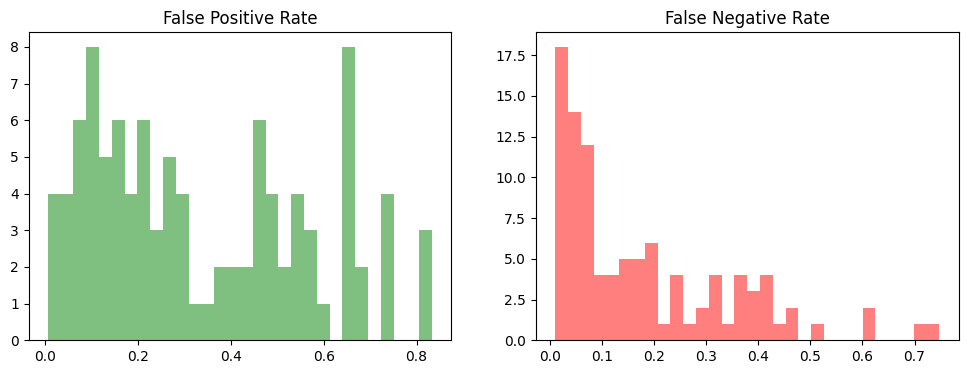

In [10]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

In [11]:
data_Sy2

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,8.841506,0.086607,0.913393,0.407339,0.592661,0.771415
1,1,8.930938,0.013214,0.986786,0.635780,0.364220,1.034556
2,2,11.500576,0.411071,0.588929,0.077064,0.922936,0.802408
3,3,9.765689,0.306964,0.693036,0.108257,0.891743,1.058043
4,4,7.694507,0.079464,0.920536,0.325688,0.674312,0.764063
...,...,...,...,...,...,...,...
95,45,12.081487,0.160179,0.839821,0.181651,0.818349,0.901594
96,46,12.380631,0.496429,0.503571,0.064220,0.935780,0.950038
97,47,16.944694,0.044286,0.955714,0.522018,0.477982,0.910701
98,48,13.917106,0.288571,0.711429,0.222018,0.777982,1.103038


Error type: FPR
Mean: 0.3101928571385714
Variance: 0.05276581483412349
Variance of estimate: 0.0005276581483412349
Standard error: 0.02297081078980964
95% Confidence Interval:  [ 0.26517006799054454 ,  0.3552156462865983 ]
-----------------------------
Error type: FNR
Mean: 0.2017706421711926
Variance: 0.0293670694892901
Variance of estimate: 0.00029367069489290103
Standard error: 0.017136822777075716
95% Confidence Interval:  [ 0.16818246952812418 ,  0.235358814814261 ]
-----------------------------
Error type: Source time
Mean: 10.368147828019946
Variance: 3.1668708798749847
Variance of estimate: 0.03166870879874985
Standard error: 0.17795704200382137
95% Confidence Interval:  [ 10.019352025692456 ,  10.716943630347437 ]
-----------------------------


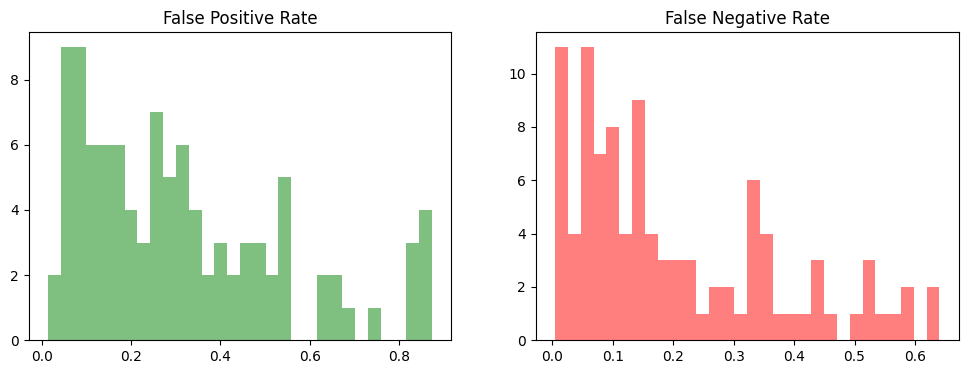

In [12]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.19012321428285714
Variance: 0.03176980242254246
Variance of estimate: 0.0003176980242254246
Standard error: 0.017824085508811514
95% Confidence Interval:  [ 0.15518800668558658 ,  0.2250584218801277 ]
-----------------------------
Error type: FNR
Mean: 0.3540366972577063
Variance: 0.05198367820761061
Variance of estimate: 0.0005198367820761061
Standard error: 0.022799929431384345
95% Confidence Interval:  [ 0.309348835572193 ,  0.3987245589432196 ]
-----------------------------
Error type: Source time
Mean: 35.84550776822032
Variance: 40.66081402644096
Variance of estimate: 0.4066081402644096
Standard error: 0.6376583256450195
95% Confidence Interval:  [ 34.595697449956084 ,  37.09531808648456 ]
-----------------------------


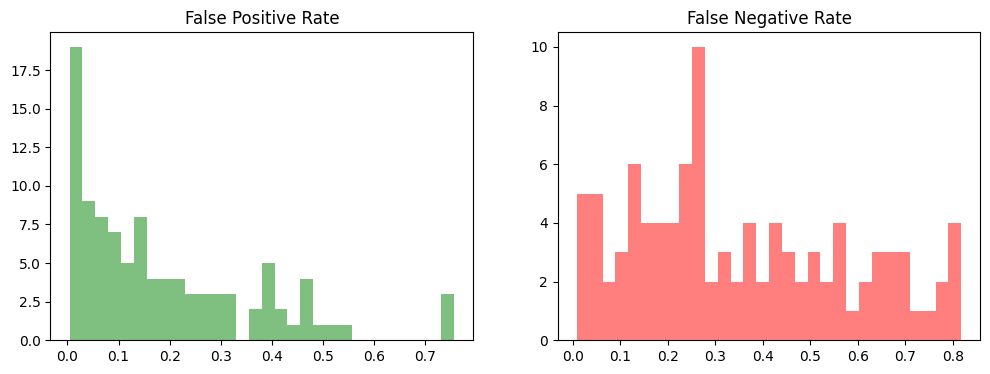

In [13]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

In [14]:
data_Sy_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,27.829138,0.220000,0.780000,0.195413,0.804587,1.032122
1,1,30.743307,0.136607,0.863393,0.353211,0.646789,0.807091
2,2,32.417515,0.117143,0.882857,0.484404,0.515596,0.794262
3,3,25.904775,0.076786,0.923214,0.317431,0.682569,1.018350
4,4,24.955844,0.331429,0.668571,0.257798,0.742202,0.811476
...,...,...,...,...,...,...,...
95,45,45.867098,0.252500,0.747500,0.449541,0.550459,1.776964
96,46,47.456840,0.644464,0.355536,0.022936,0.977064,1.087523
97,47,47.110744,0.228929,0.771071,0.303670,0.696330,1.106219
98,48,45.295260,0.024821,0.975179,0.716514,0.283486,1.004893


Error type: FPR
Mean: 0.21279285715571425
Variance: 0.042323033595060414
Variance of estimate: 0.0004232303359506041
Standard error: 0.0205725626976953
95% Confidence Interval:  [ 0.17247063426823145 ,  0.25311508004319705 ]
-----------------------------
Error type: FNR
Mean: 0.34490825688330273
Variance: 0.0518751418741412
Variance of estimate: 0.000518751418741412
Standard error: 0.022776115093259695
95% Confidence Interval:  [ 0.3002670713005137 ,  0.38954944246609174 ]
-----------------------------
Error type: Source time
Mean: 36.976847261990095
Variance: 43.337366371760105
Variance of estimate: 0.43337366371760105
Standard error: 0.6583112210175375
95% Confidence Interval:  [ 35.686557268795724 ,  38.267137255184466 ]
-----------------------------


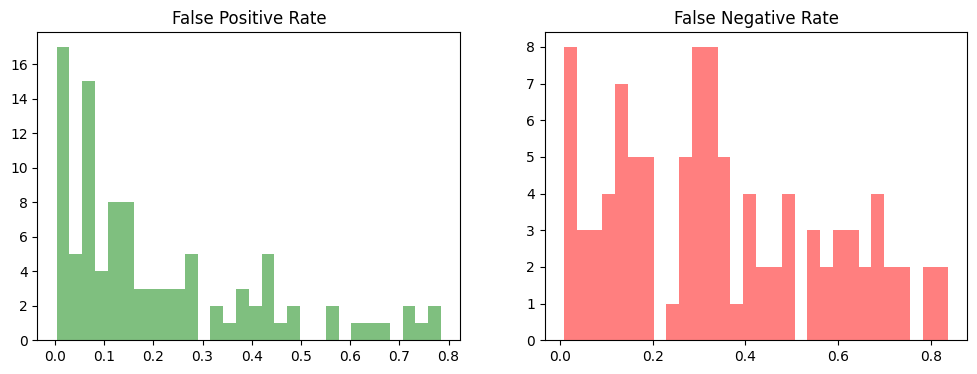

In [15]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [16]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.150179,0.119286,0.135179,0.086607,0.080179,0.220000,0.038036
1,0.158750,0.107143,0.053929,0.013214,0.045714,0.136607,0.018750
2,0.278214,0.371429,0.007500,0.411071,0.017500,0.117143,0.020714
3,0.753929,0.017679,0.833393,0.306964,0.010714,0.076786,0.267857
4,0.020179,0.091071,0.747321,0.079464,0.330179,0.331429,0.166429
...,...,...,...,...,...,...,...
95,0.683750,0.151429,0.657679,0.160179,0.213750,0.252500,NaN
96,0.834821,0.440179,0.126607,0.496429,0.233393,0.644464,NaN
97,0.149286,0.081607,0.641250,0.044286,0.386071,0.228929,NaN
98,0.253393,0.541250,0.062500,0.288571,0.072500,0.024821,NaN


<Axes: title={'center': 'FPR'}>

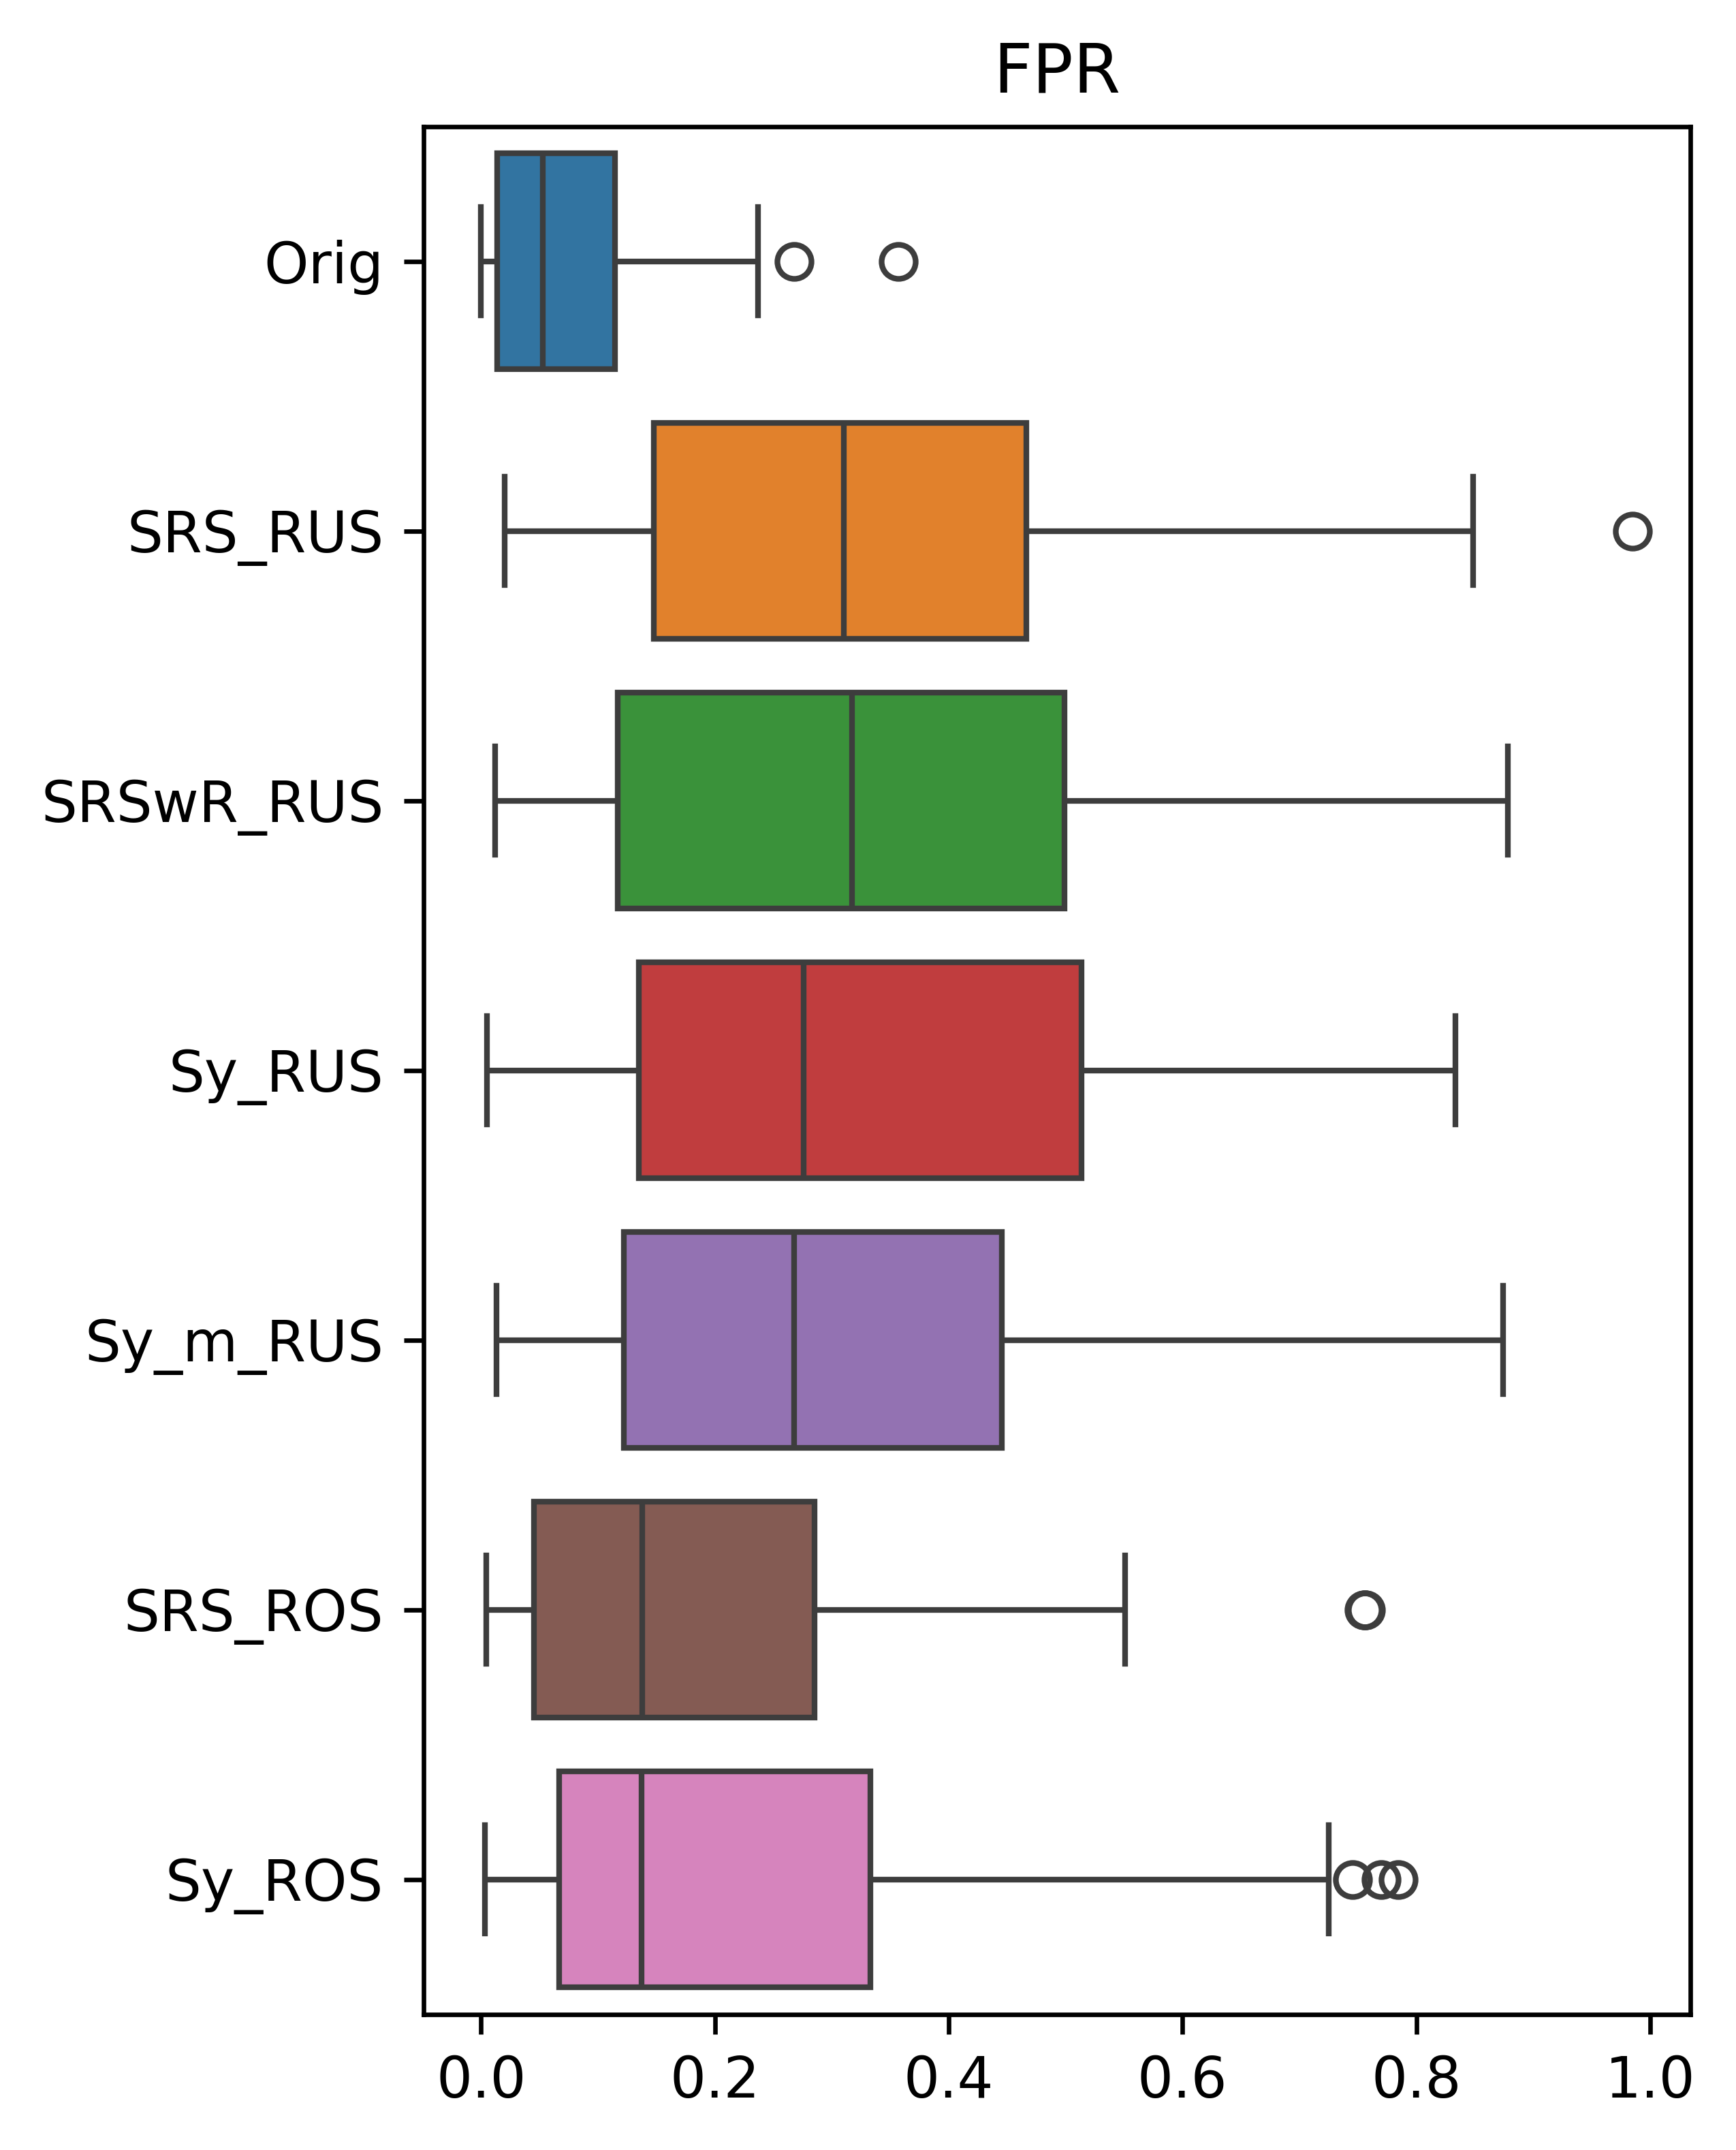

In [17]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [18]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.202752,0.315596,0.255046,0.407339,0.418349,0.195413,0.558716
1,0.175229,0.269725,0.621101,0.635780,0.566972,0.353211,0.602752
2,0.114679,0.088073,0.717431,0.077064,0.764220,0.484404,0.471560
3,0.016514,0.564220,0.011927,0.108257,0.794495,0.317431,0.378899
4,0.632110,0.301835,0.011009,0.325688,0.138532,0.257798,0.157798
...,...,...,...,...,...,...,...
95,0.022936,0.178899,0.026606,0.181651,0.230275,0.449541,NaN
96,0.007339,0.080734,0.277982,0.064220,0.216514,0.022936,NaN
97,0.294495,0.414679,0.022018,0.522018,0.094495,0.303670,NaN
98,0.129358,0.037615,0.349541,0.222018,0.470642,0.716514,NaN


<Axes: title={'center': 'FNR'}>

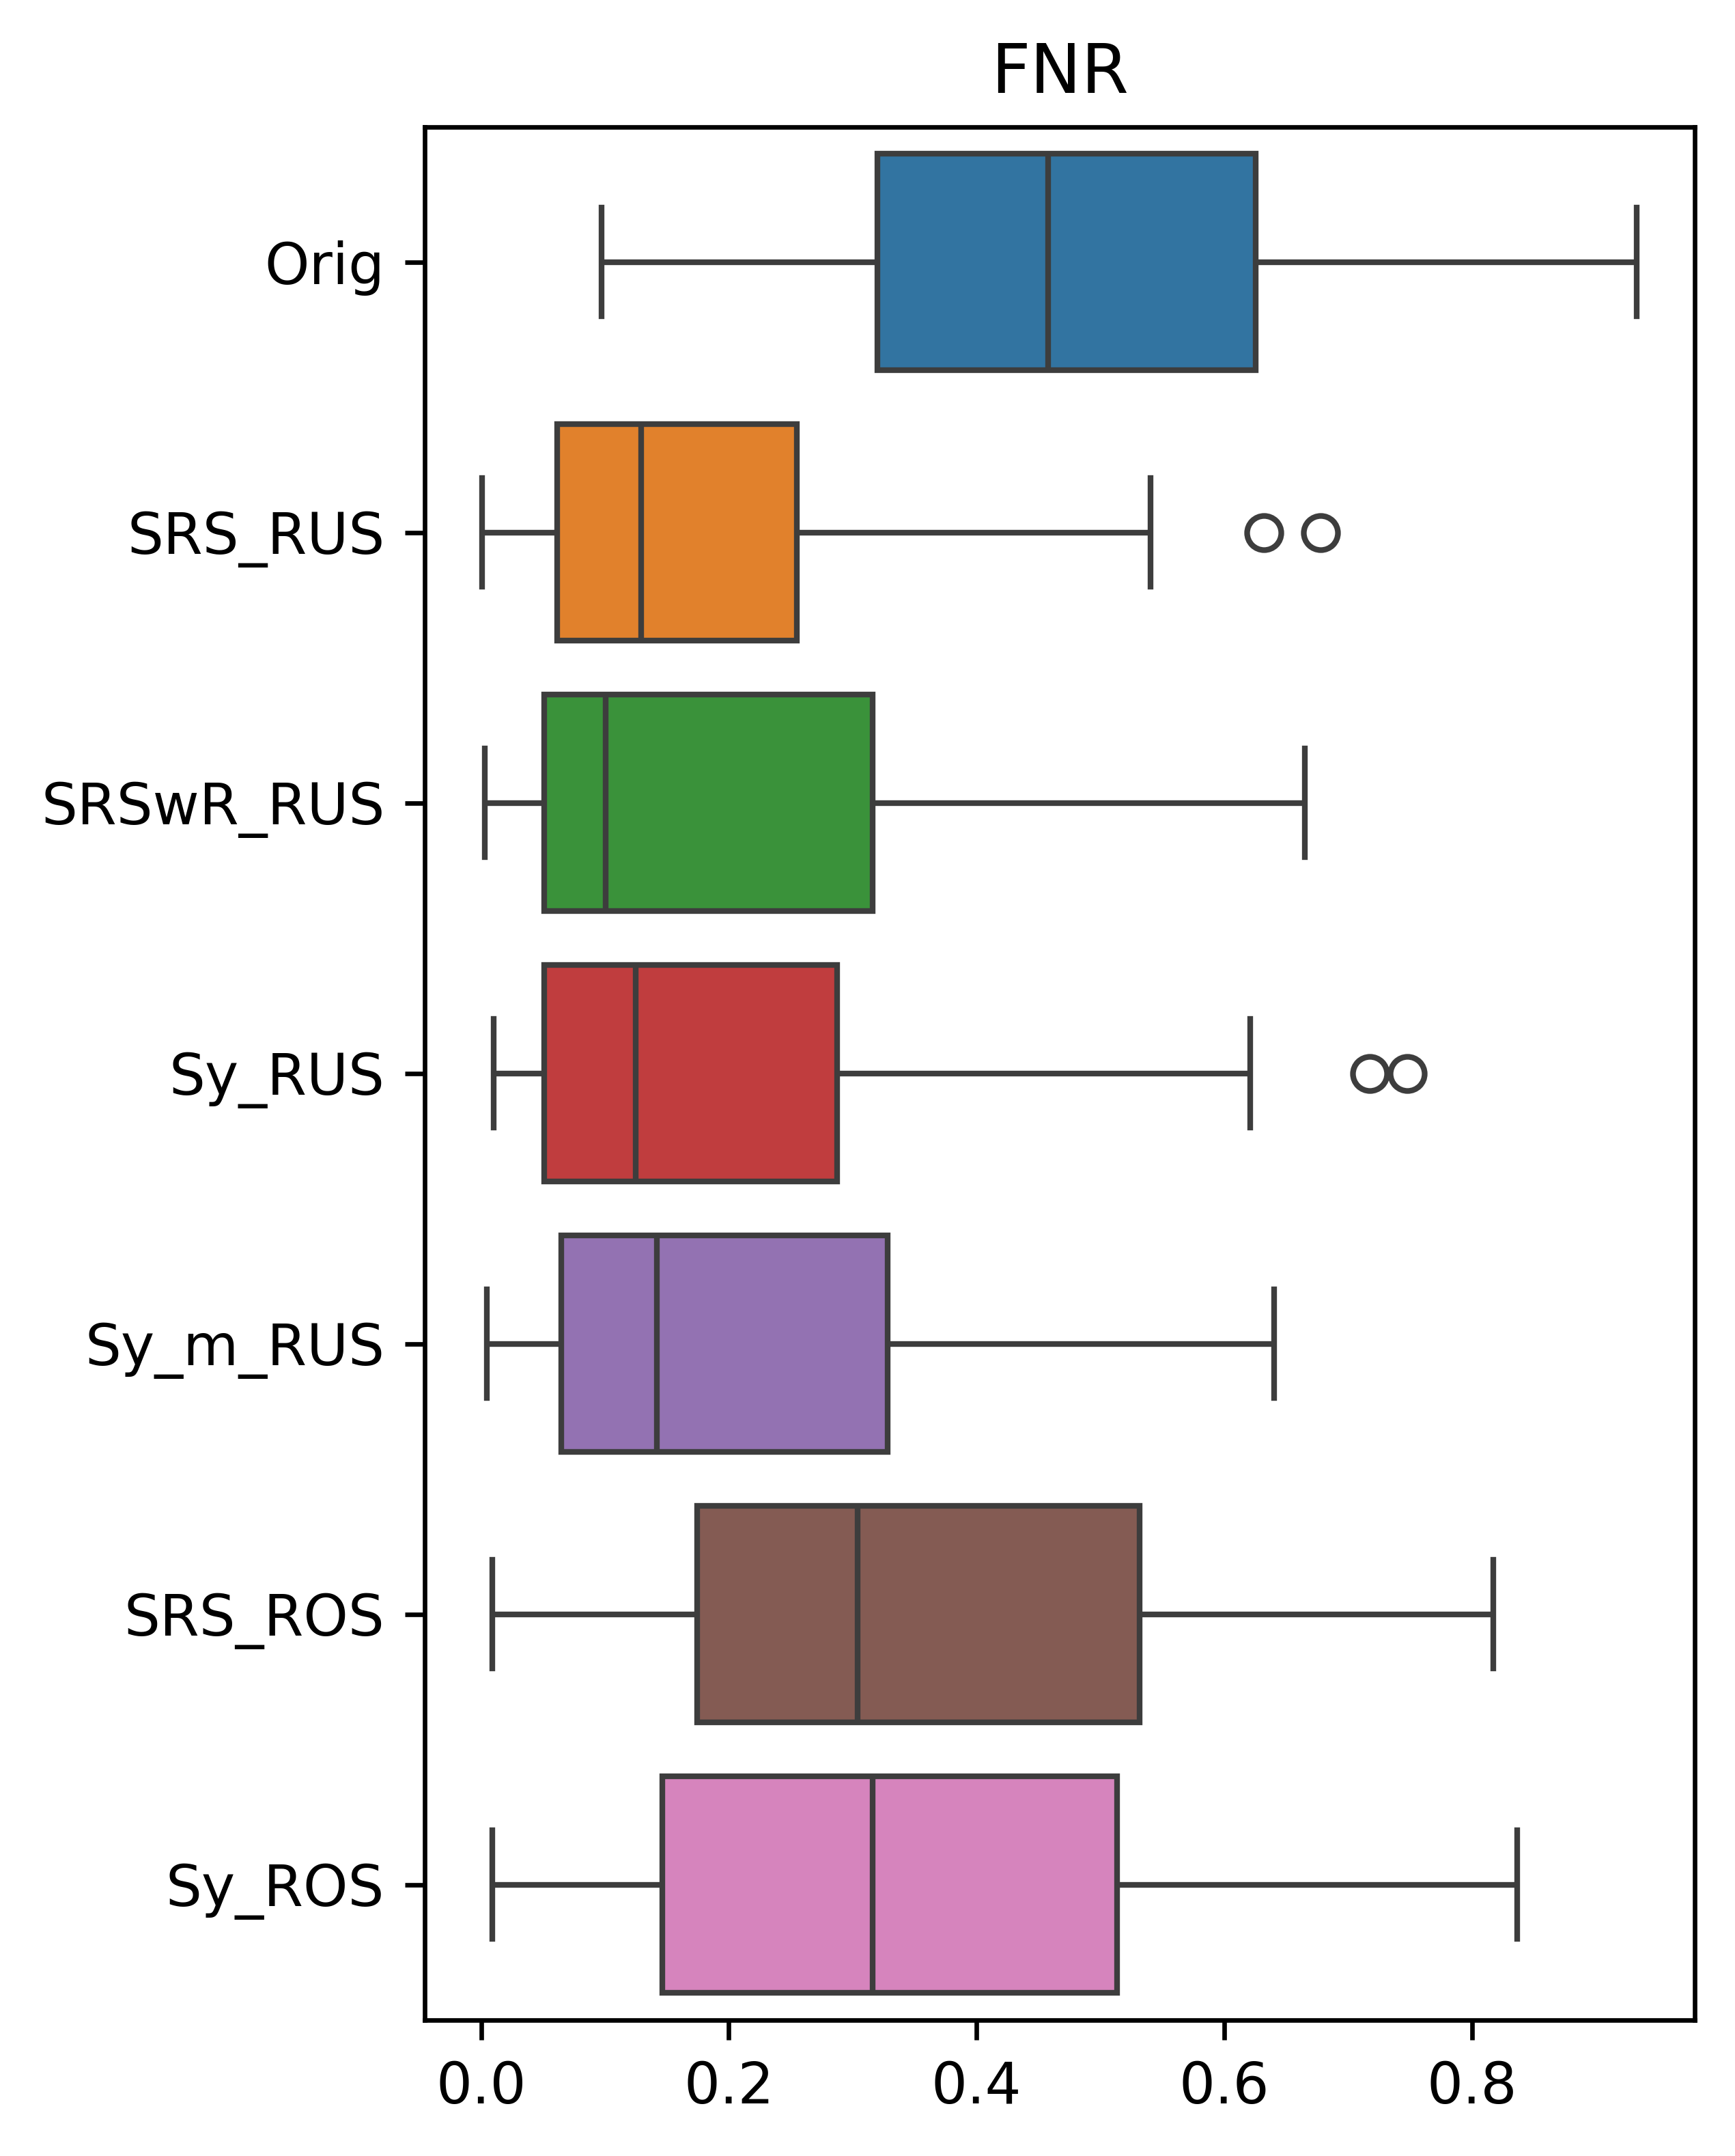

In [19]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [20]:
Time = pd.DataFrame()

DF = Time


DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time
DF['Orig'] = orig_time
DF

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,8.274799,7.739424,11.343868,8.841506,29.846406,27.829138,19.219129
1,8.520751,8.429336,9.405214,8.930938,26.426421,30.743307,16.525314
2,8.490868,8.844368,9.173153,11.500576,29.116908,32.417515,18.492016
3,8.635456,13.341260,7.683831,9.765689,31.067063,25.904775,25.032075
4,7.494559,9.170395,8.259921,7.694507,30.781929,24.955844,19.575501
...,...,...,...,...,...,...,...
95,12.543428,12.087176,13.577002,12.081487,49.412158,45.867098,NaN
96,11.950231,12.849380,11.746680,12.380631,41.575226,47.456840,NaN
97,12.551837,12.884591,13.520614,16.944694,38.767316,47.110744,NaN
98,15.594367,13.858316,13.114145,13.917106,43.533214,45.295260,NaN


<Axes: title={'center': 'Training Time'}>

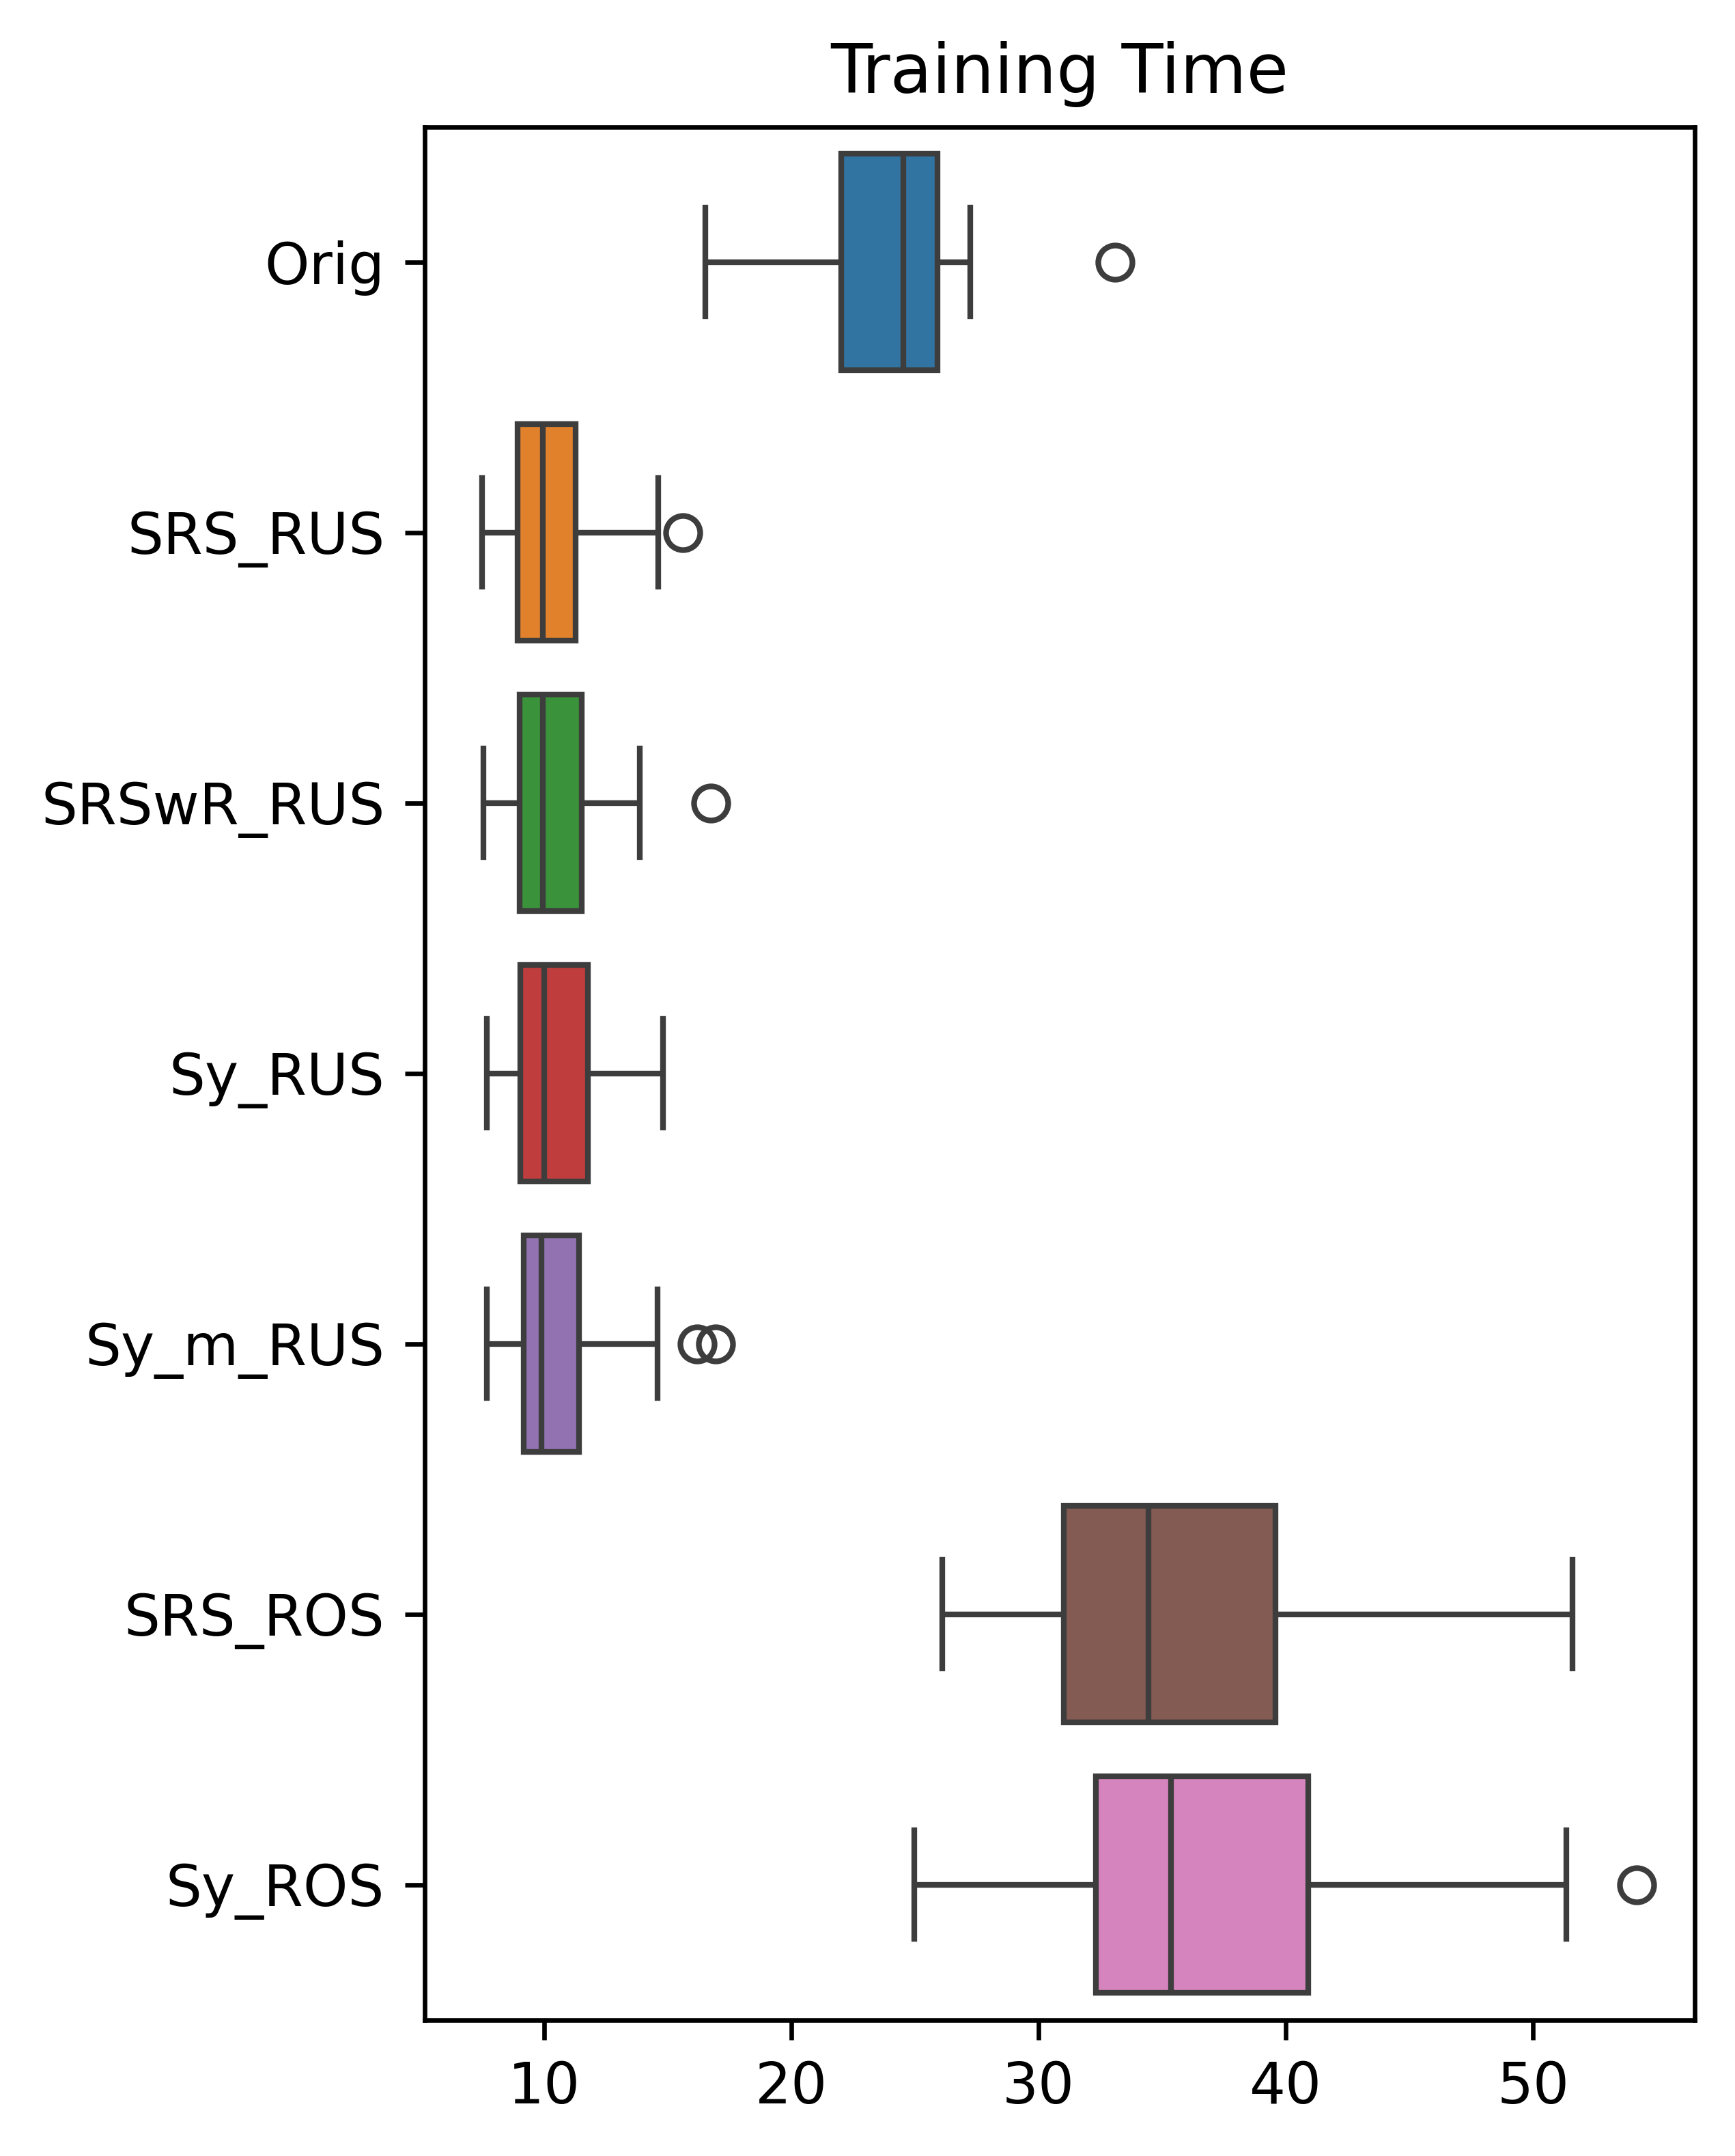

In [21]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')